In [1]:
import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os

# Đổi thư mục này. Mapping với drive

for dirname, _, filenames in os.walk('/kaggle/input/dataset/dataset'):

    print("dir name",dirname)

    for filename in filenames:

        print(os.path.join(dirname, filename))

dir name /kaggle/input/dataset/dataset
dir name /kaggle/input/dataset/dataset/test
/kaggle/input/dataset/dataset/test/TCP_IP-DDoS-ICMP2_test.pcap.csv
/kaggle/input/dataset/dataset/test/TCP_IP-DoS-ICMP_test.pcap.csv
/kaggle/input/dataset/dataset/test/TCP_IP-DoS-TCP_test.pcap.csv
/kaggle/input/dataset/dataset/test/MQTT-DDoS-Connect_Flood_test.pcap.csv
/kaggle/input/dataset/dataset/test/MQTT-DoS-Connect_Flood_test.pcap.csv
/kaggle/input/dataset/dataset/test/Benign_test.pcap.csv
/kaggle/input/dataset/dataset/test/TCP_IP-DoS-UDP_test.pcap.csv
/kaggle/input/dataset/dataset/test/Recon-Ping_Sweep_test.pcap.csv
/kaggle/input/dataset/dataset/test/MQTT-DDoS-Publish_Flood_test.pcap.csv
/kaggle/input/dataset/dataset/test/TCP_IP-DDoS-SYN_test.pcap.csv
/kaggle/input/dataset/dataset/test/TCP_IP-DDoS-TCP_test.pcap.csv
/kaggle/input/dataset/dataset/test/TCP_IP-DoS-SYN_test.pcap.csv
/kaggle/input/dataset/dataset/test/TCP_IP-DDoS-UDP1_test.pcap.csv
/kaggle/input/dataset/dataset/test/TCP_IP-DDoS-UDP2_test.

In [2]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc

import numpy as np

import os

import pandas as pd

In [3]:

def merge_files_in_folder(folder_path):

    # Initialize an empty list to store DataFrames

    dfs = []

    # Loop through each file in the folder

    for filename in os.listdir(folder_path):

        # Extract label from filename and remove numbers at the end

        label = filename.split("_train.pcap.csv")[0].split("_test.pcap.csv")[0].split("1234567890")[0]

        # Remove numeric part if it exists

        label = ''.join(filter(str.isalpha, label))

        # Read the file into a DataFrame

        filepath = os.path.join(folder_path, filename)

        df = pd.read_csv(filepath)



        # Add a 'label' column with the current label

        df['label'] = label



        # Append the DataFrame to the list

        dfs.append(df)



    # Concatenate all DataFrames in the list

    merged_data = pd.concat(dfs, ignore_index=True)

    # Display value counts of labels

    print("Value counts of labels in train data:")

    print(merged_data['label'].value_counts())

    return merged_data
# Merge files in the train folder

train_folder_path = "/kaggle/input/dataset/dataset/train"

test_folder_path = "/kaggle/input/dataset/dataset/test"



train_df=merge_files_in_folder(train_folder_path)

test_df=merge_files_in_folder(test_folder_path)

Value counts of labels in train data:
label
TCPIPDDoSUDP            1635956
TCPIPDDoSICMP           1537476
TCPIPDDoSTCP             804465
TCPIPDDoSSYN             801962
TCPIPDoSSYN              441903
TCPIPDoSICMP             416292
TCPIPDoSUDP              289447
TCPIPDoSTCP              286896
Benign                   192732
MQTTDDoSConnectFlood     173036
ReconPortScan             83981
MQTTDoSPublishFlood       44376
MQTTDDoSPublishFlood      27623
ReconOSScan               16832
ARPSpoofing               16047
MQTTDoSConnectFlood       12773
MQTTMalformedData          5130
ReconVulScan               2173
ReconPingSweep              740
Name: count, dtype: int64
Value counts of labels in train data:
label
TCPIPDDoSUDP            362070
TCPIPDDoSICMP           349699
TCPIPDDoSTCP            182598
TCPIPDDoSSYN            172397
TCPIPDoSUDP             137553
TCPIPDoSSYN              98595
TCPIPDoSICMP             98432
TCPIPDoSTCP              82096
MQTTDDoSConnectFlood     41916

In [4]:
df_head = train_df.head()

df_info= train_df.info()

df_shape=train_df.shape



print(df_head)

print(df_info)

print(df_shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6789840 entries, 0 to 6789839
Data columns (total 46 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Header_Length    float64
 1   Protocol Type    float64
 2   Duration         float64
 3   Rate             float64
 4   Srate            float64
 5   Drate            float64
 6   fin_flag_number  float64
 7   syn_flag_number  float64
 8   rst_flag_number  float64
 9   psh_flag_number  float64
 10  ack_flag_number  float64
 11  ece_flag_number  float64
 12  cwr_flag_number  float64
 13  ack_count        float64
 14  syn_count        float64
 15  fin_count        float64
 16  rst_count        float64
 17  HTTP             float64
 18  HTTPS            float64
 19  DNS              float64
 20  Telnet           float64
 21  SMTP             float64
 22  SSH              float64
 23  IRC              float64
 24  TCP              float64
 25  UDP              float64
 26  DHCP             float64
 27  ARP         

In [5]:
merged_df = pd.concat([train_df, test_df], ignore_index=True)

merged_df.head()

,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,134.3,7.1,64.0,40415.288318,40415.288318,0.0,0.0,0.0,0.0,0.5,...,48.225852,95.3,1.694641e+08,5.5,15.312231,68.201654,2644.242675,0.9,38.5,Benign
1,137.0,4.7,49.9,58749.191833,58749.191833,0.0,0.0,0.0,0.0,0.2,...,59.753361,125.6,1.694641e+08,13.5,13.468364,84.997147,5328.483794,1.0,244.6,Benign
2,283.9,6.0,64.0,3.497439,3.497439,0.0,0.0,0.0,0.0,0.5,...,10.223690,80.6,8.070469e-05,5.5,12.229315,14.458481,124.725884,0.9,38.5,Benign
3,297.3,6.0,64.0,7297.703020,7297.703020,0.0,0.0,0.0,0.0,0.5,...,15.625023,78.5,1.694641e+08,13.5,12.552920,21.904691,240.536207,1.0,244.6,Benign
4,572.3,7.1,57.7,2.549120,2.549120,0.0,0.0,0.0,0.0,0.4,...,69.738867,139.0,9.993820e-02,5.5,13.928729,98.625651,11737.768847,0.9,38.5,Benign


In [6]:
merged_df.shape

merged_df['label'].value_counts()

label
TCPIPDDoSUDP            1998026
TCPIPDDoSICMP           1887175
TCPIPDDoSTCP             987063
TCPIPDDoSSYN             974359
TCPIPDoSSYN              540498
TCPIPDoSICMP             514724
TCPIPDoSUDP              427000
TCPIPDoSTCP              368992
Benign                   230339
MQTTDDoSConnectFlood     214952
ReconPortScan            106603
MQTTDoSPublishFlood       52881
MQTTDDoSPublishFlood      36039
ReconOSScan               20666
ARPSpoofing               17791
MQTTDoSConnectFlood       15904
MQTTMalformedData          5130
ReconVulScan               3207
ReconPingSweep              926
Name: count, dtype: int64

In [7]:
# Assuming train_df is your DataFrame
train_df = train_df.sample(frac=1).reset_index(drop=True)

# Assuming test_df is your DataFrame
test_df = test_df.sample(frac=1).reset_index(drop=True)

In [8]:
# Check for missing values

missing_values = train_df.isnull().sum()



# Check for duplicate rows

duplicates = train_df.duplicated().sum()



print("missing values:",missing_values)

print("duplicate values:",duplicates)

missing values: Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IGMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
label              0
dtype: int64
dupli

In [9]:
missing_values = test_df.isnull().sum()



duplicates = test_df.duplicated().sum()



print("missing values:",missing_values)

print("duplicate values:",duplicates)

missing values: Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IGMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
label              0
dtype: int64
dupli

In [10]:
# remove duplicates rồi đi train
train_df = train_df.drop_duplicates()

test_df = test_df.drop_duplicates()

In [11]:
missing_values = train_df.isnull().sum()

duplicates = train_df.duplicated().sum()



print("missing values:",missing_values)

print("duplicate values:",duplicates)



missing_values = test_df.isnull().sum()

duplicates = test_df.duplicated().sum()



print("missing values:",missing_values)

print("duplicate values:",duplicates)

missing values: Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IGMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
label              0
dtype: int64
dupli

In [12]:
train_attack_label_counts = train_df['label'].value_counts()

print(train_attack_label_counts)

label
TCPIPDDoSUDP            1635956
TCPIPDDoSICMP           1536820
TCPIPDDoSTCP             804465
TCPIPDDoSSYN             801946
TCPIPDoSSYN              441903
TCPIPDoSICMP             416292
TCPIPDoSUDP              289447
TCPIPDoSTCP              286896
Benign                   192732
MQTTDDoSConnectFlood     173036
ReconPortScan             80247
MQTTDoSPublishFlood       44376
MQTTDDoSPublishFlood      27623
ReconOSScan               16163
ARPSpoofing               16047
MQTTDoSConnectFlood       12773
MQTTMalformedData          5130
ReconVulScan               2129
ReconPingSweep              740
Name: count, dtype: int64


In [13]:
test_attack_label_counts = test_df['label'].value_counts()

print(test_attack_label_counts)

label
TCPIPDDoSUDP            362070
TCPIPDDoSICMP           349698
TCPIPDDoSTCP            182597
TCPIPDDoSSYN            172397
TCPIPDoSUDP             137553
TCPIPDoSSYN              98595
TCPIPDoSICMP             98432
TCPIPDoSTCP              82096
MQTTDDoSConnectFlood     41916
Benign                   37607
ReconPortScan            20921
MQTTDoSPublishFlood       8505
MQTTDDoSPublishFlood      8416
ReconOSScan               3495
MQTTDoSConnectFlood       3131
ARPSpoofing               1744
ReconVulScan              1011
ReconPingSweep             186
Name: count, dtype: int64


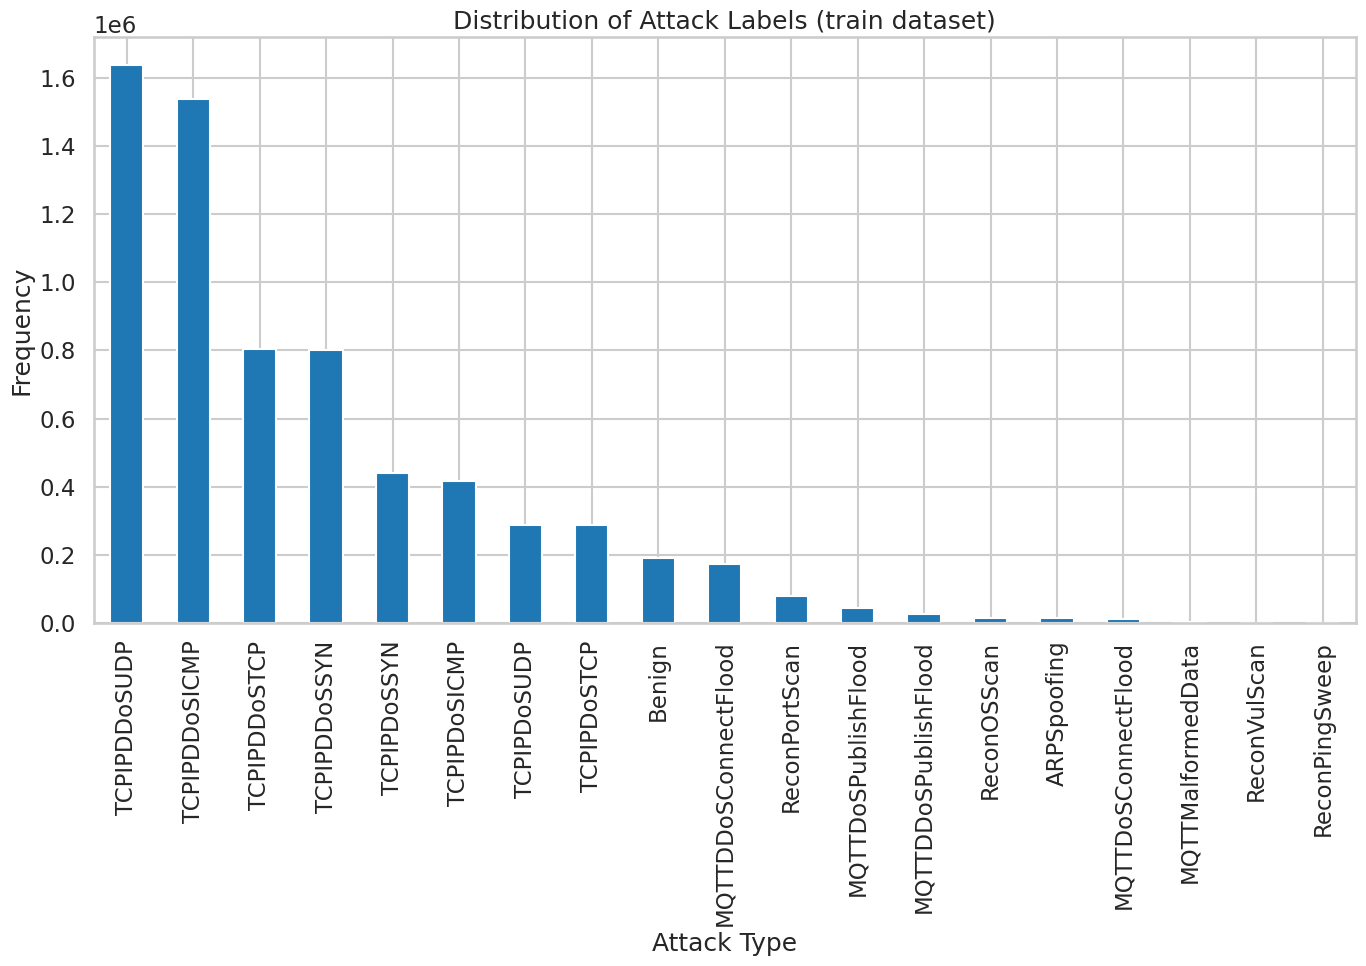

In [14]:
    # Set the style for seaborn plots
    
    import seaborn as sns
    
    import matplotlib.pyplot as plt
    
    sns.set_style('whitegrid')
    
    
    
    # Increase default font size for readability
    
    sns.set_context('talk')
    
    # Set the aesthetic style of the plots
    
    sns.set_style("whitegrid")
    
    
    
    # Bar chart for the distribution of attack labels
    
    plt.figure(figsize=(14, 10))
    
    train_attack_label_counts.plot(kind='bar')
    
    plt.title('Distribution of Attack Labels (train dataset)')
    
    plt.xlabel('Attack Type')
    
    plt.ylabel('Frequency')
    
    plt.xticks(rotation=90)  # Rotate the x labels to show them clearly
    
    plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
    
    
    
    # Show the plot
    
    plt.show()

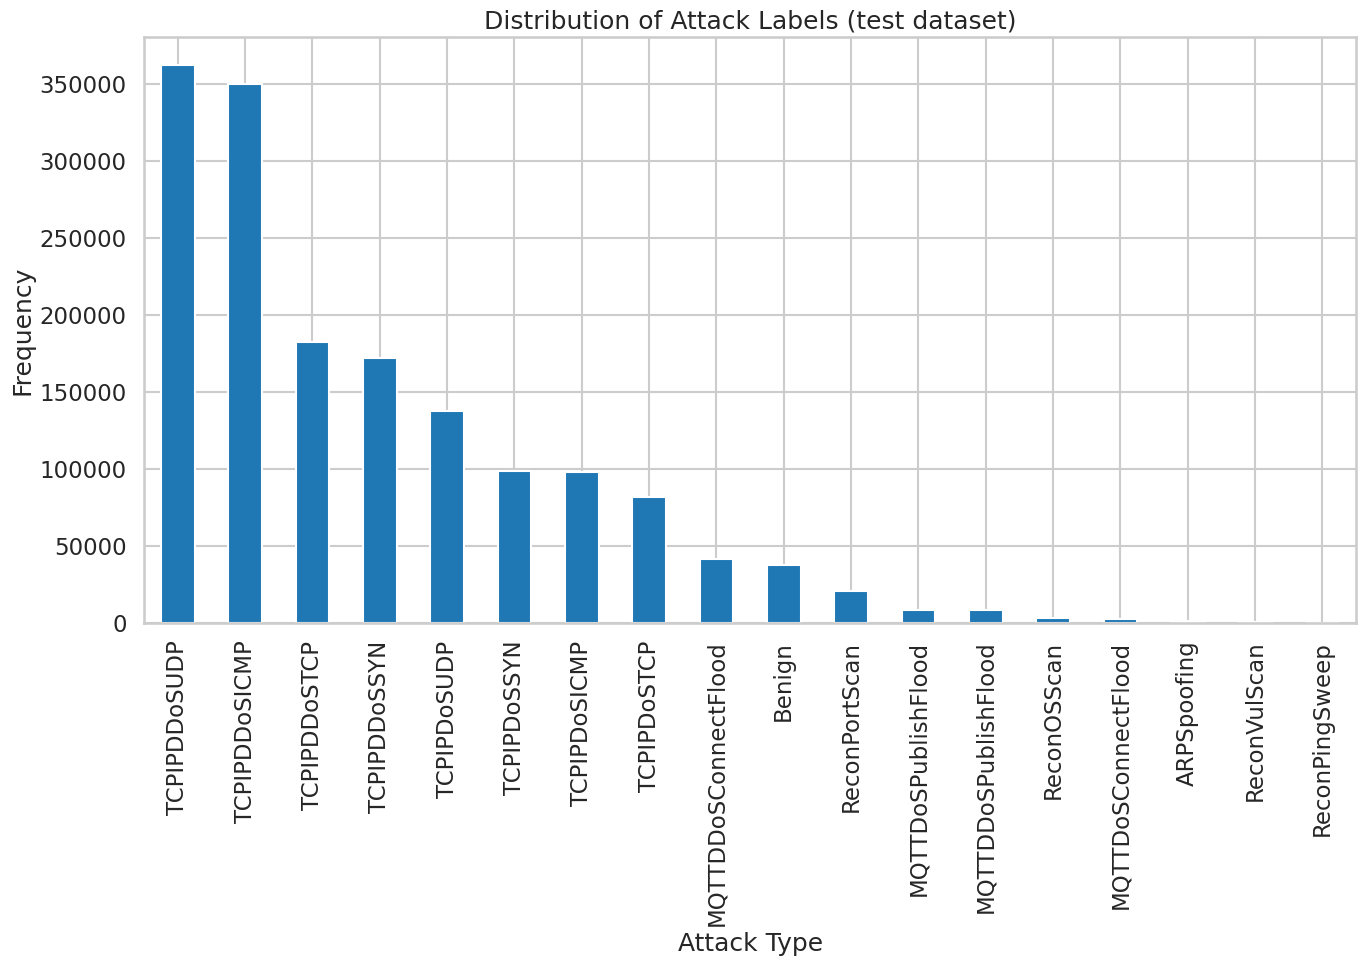

In [15]:
import matplotlib.pyplot as plt

sns.set_style('whitegrid')



# Increase default font size for readability

sns.set_context('talk')

# Set the aesthetic style of the plots

sns.set_style("whitegrid")



# Bar chart for the distribution of attack labels

plt.figure(figsize=(14, 10))

test_attack_label_counts.plot(kind='bar')

plt.title('Distribution of Attack Labels (test dataset)')

plt.xlabel('Attack Type')

plt.ylabel('Frequency')

plt.xticks(rotation=90)  # Rotate the x labels to show them clearly

plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping



# Show the plot

plt.show()

In [16]:
# Mapping labels to new categories for 6 classes

label_map_6_classes = {

    "DDos": ["TCPIPDDoSUDP", "TCPIPDDoSICMP", "TCPIPDDoSTCP", "TCPIPDDoSSYN"],

    "Dos": ["TCPIPDoSUDP", "TCPIPDoSSYN", "TCPIPDoSICMP", "TCPIPDoSTCP"],

    "MQTT": ["MQTTDDoSConnectFlood", "MQTTDoSPublishFlood", "MQTTDDoSPublishFlood", "MQTTDoSConnectFlood","MQTTMalformedData"],

    "SPOOFING": ["ARPSpoofing"],

    "RECON": ["ReconPortScan", "ReconOSScan", "ReconVulScan", "ReconPingSweep"],

    "Benign": ["Benign"]

}



# Mapping labels to new categories for 2 classes

label_map_2_classes = {

    "Benign": ["Benign"],

    "Attack": ["TCPIPDDoSUDP", "TCPIPDDoSICMP", "TCPIPDDoSTCP", "TCPIPDDoSSYN", "TCPIPDoSUDP", "TCPIPDoSSYN",

               "TCPIPDoSICMP", "TCPIPDoSTCP", "MQTTDDoSConnectFlood", "ReconPortScan", "MQTTDoSPublishFlood",

               "MQTTDDoSPublishFlood", "ReconOSScan", "ARPSpoofing", "MQTTDoSConnectFlood", "MQTTMalformedData",

               "ReconVulScan", "ReconPingSweep"]

}



# Function to map labels to new categories

def map_labels_to_categories(labels, label_map):

    categories = []

    for label in labels:

        for category, labels_list in label_map.items():

            if label in labels_list:

                categories.append(category)

                break

    return categories



# Map labels to categories for 6 classes

labels_6_class = map_labels_to_categories(train_df['label'], label_map_6_classes)

labels_6_class_test = map_labels_to_categories(test_df['label'], label_map_6_classes)



# Map labels to categories for 2 classes

labels_2_class = map_labels_to_categories(train_df['label'], label_map_2_classes)

labels_2_class_test = map_labels_to_categories(test_df['label'], label_map_2_classes)

In [17]:
labels_6_class = pd.Series(labels_6_class)

labels_2_class = pd.Series(labels_2_class)

labels_6_class_test = pd.Series(labels_6_class_test)

labels_2_class_test = pd.Series(labels_2_class_test)

print(labels_2_class.shape)

print(labels_6_class.shape)

print(train_df.shape)

print(labels_2_class_test.shape)

print(labels_6_class_test.shape)

(6784721,)
(6784721,)
(6784721, 46)
(1610370,)
(1610370,)


In [18]:
label_counts_6_classes = labels_6_class.value_counts()

print("6 Classes Value Count\n",label_counts_6_classes)

label_counts_2_classes = labels_2_class.value_counts()

print("2 Classes Value Count\n",label_counts_2_classes)

6 Classes Value Count
 DDos        4779187
Dos         1434538
MQTT         262938
Benign       192732
RECON         99279
SPOOFING      16047
Name: count, dtype: int64
2 Classes Value Count
 Attack    6591989
Benign     192732
Name: count, dtype: int64


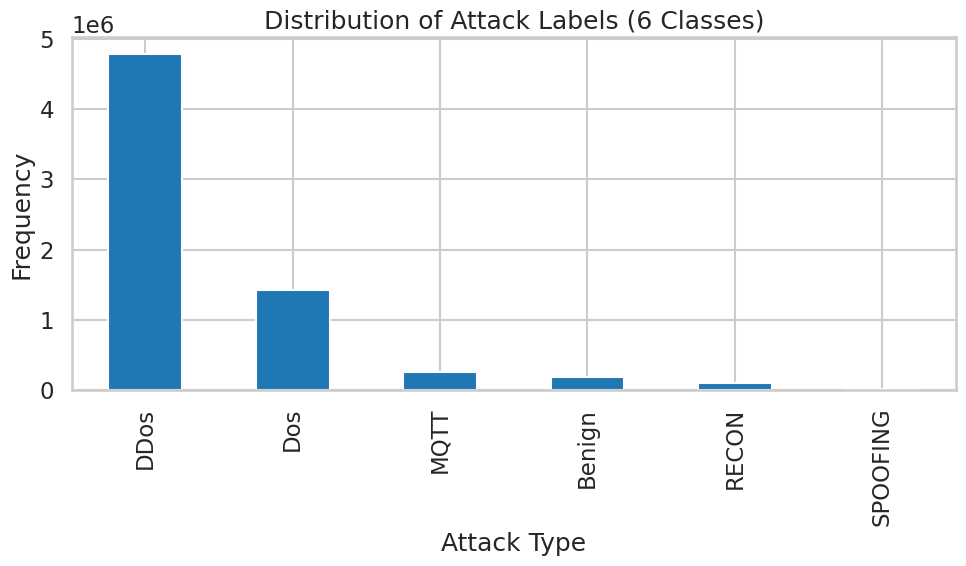

In [19]:
import seaborn as sns

sns.set_style('whitegrid')



# Increase default font size for readability

sns.set_context('talk')

# Set the aesthetic style of the plots

sns.set_style("whitegrid")



# Bar chart for the distribution of attack labels

plt.figure(figsize=(10, 6))

label_counts_6_classes.plot(kind='bar')

plt.title('Distribution of Attack Labels (6 Classes)')

plt.xlabel('Attack Type')

plt.ylabel('Frequency')

plt.xticks(rotation=90)  # Rotate the x labels to show them clearly

plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping



# Show the plot

plt.show()

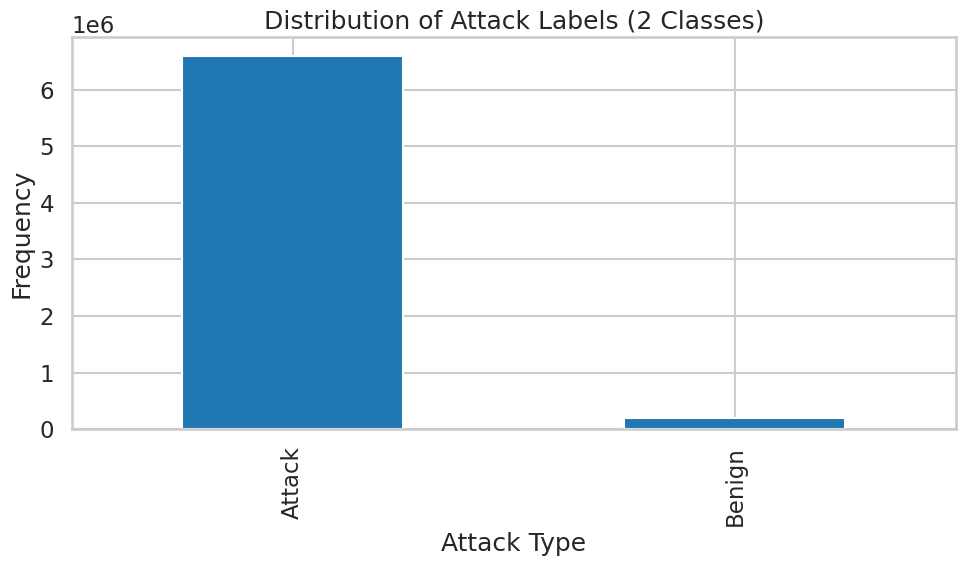

In [20]:
import seaborn as sns

sns.set_style('whitegrid')



# Increase default font size for readability

sns.set_context('talk')

# Set the aesthetic style of the plots

sns.set_style("whitegrid")



# Bar chart for the distribution of attack labels

plt.figure(figsize=(10, 6))

label_counts_2_classes.plot(kind='bar')

plt.title('Distribution of Attack Labels (2 Classes)')

plt.xlabel('Attack Type')

plt.ylabel('Frequency')

plt.xticks(rotation=90)  # Rotate the x labels to show them clearly

plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping



# Show the plot

plt.show()

In [21]:
# Import label encoder

from sklearn import preprocessing



# label_encoder object knows

# how to understand word labels.

label_encoder = preprocessing.LabelEncoder()

label_encoder1 = preprocessing.LabelEncoder()



# Encode labels in column 'species'.

train_df['label']= label_encoder.fit_transform(train_df['label'])

test_df['label']= label_encoder1.fit_transform(test_df['label'])

labels_6_class= label_encoder.fit_transform(labels_6_class)

labels_2_class= label_encoder.fit_transform(labels_2_class)

labels_6_class_test= label_encoder.fit_transform(labels_6_class_test)

labels_2_class_test= label_encoder.fit_transform(labels_2_class_test)

In [22]:
X = train_df.drop('label', axis=1)

y = train_df['label']

In [23]:
X_test = test_df.drop('label', axis=1)

y_test = test_df['label']

In [24]:
del train_df

del test_df

In [ ]:
import numpy as np

import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score

# Standardize the features

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X)

X_test_scaled = scaler.transform(X_test)

# Number of classes

num_classes = 19

print(y_test.shape)

print(labels_6_class_test.shape)

# Convert class vectors to binary class matrices

y_train = tf.keras.utils.to_categorical(y, num_classes)

original_labels = np.argmax(y_train, axis=1) 
unique_labels = np.unique(original_labels)
print("Danh sách các nhãn trong y_train:")
print(unique_labels)

y_test = tf.keras.utils.to_categorical(y_test, num_classes)

y_test_6_class = tf.keras.utils.to_categorical(labels_6_class_test, 6)

y_test_2_class = tf.keras.utils.to_categorical(labels_2_class_test, 2)

y_train_6_class = tf.keras.utils.to_categorical(labels_6_class, 6)

y_train_2_class = tf.keras.utils.to_categorical(labels_2_class, 2)

print(X_test_scaled.shape)

print(y_test.shape)

print(y_test_6_class.shape)

In [26]:
print(y_train.shape)

(6784721, 19)


In [27]:
del X

del y

In [28]:
# Define callbacks

checkpoint = ModelCheckpoint("best_model.keras", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

tensorboard = TensorBoard(log_dir='./logs', histogram_freq=1)



# Training loop

epochs = 10

In [29]:
num_classes = 19 # So loai tan cong

model = Sequential([

    Dense(64, activation='relu', input_shape=(45,)),

    Dropout(0.2),  # Add dropout regularization

    Dense(32, activation='relu'),

    Dense(num_classes, activation='softmax')  # Using softmax activation for multiclass classification

])



# Compile the model

model.compile(optimizer='adam',

              loss='categorical_crossentropy',

              metrics=['accuracy'])



# Train the model: num_classes, epochs..

history = model.fit(X_train_scaled, y_train, epochs=2, batch_size=32, validation_split=0.2,callbacks=[checkpoint, early_stopping, tensorboard])


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/2
169600/169618 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8122 - loss: 0.4515
Epoch 1: val_accuracy improved from -inf to 0.82541, saving model to best_model.keras
169618/169618 ━━━━━━━━━━━━━━━━━━━━ 389s 2ms/step - accuracy: 0.8122 - loss: 0.4515 - val_accuracy: 0.8254 - val_loss: 0.4034
Epoch 2/2
169598/169618 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8240 - loss: 0.4091
Epoch 2: val_accuracy improved from 0.82541 to 0.82708, saving model to best_model.keras
169618/169618 ━━━━━━━━━━━━━━━━━━━━ 374s 2ms/step - accuracy: 0.8240 - loss: 0.4091 - val_accuracy: 0.8271 - val_loss: 0.3985
Restoring model weights from the end of the best epoch: 2.


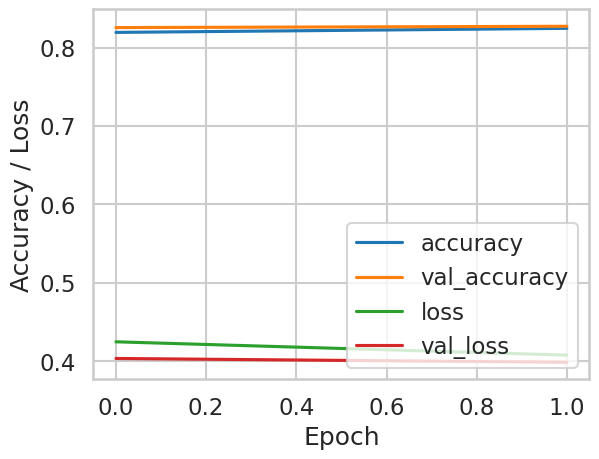

In [32]:
# Accuracy and loss graph

plt.plot(history.history['accuracy'], label='accuracy')

plt.plot(history.history['val_accuracy'], label='val_accuracy')

plt.plot(history.history['loss'], label='loss')

plt.plot(history.history['val_loss'], label='val_loss')

plt.xlabel('Epoch')

plt.ylabel('Accuracy / Loss')

plt.legend(loc='lower right')

plt.show()

In [36]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)

print("Test Loss:", test_loss)

print("Test Accuracy:", test_accuracy)



# Confusion Matrix and Classification Report

y_pred = np.argmax(model.predict(X_test_scaled), axis=-1)

cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

print("Confusion Matrix:")

print(cm)

print("Classification Report:")

print(classification_report(np.argmax(y_test, axis=1), y_pred))

50325/50325 ━━━━━━━━━━━━━━━━━━━━ 57s 1ms/step - accuracy: 0.0557 - loss: 24.9725
Test Loss: 24.95181655883789
Test Accuracy: 0.05579649284482002
50325/50325 ━━━━━━━━━━━━━━━━━━━━ 58s 1ms/step
Confusion Matrix:
[[   882    795      0      0      0      0      5      0      0     60
       0      0      0      2      0      0      0      0      0]
 [  2758  34203      0      0      0      0      9      0      0    622
       0      0      0     14      0      0      0      0      1]
 [     0      2  41896      1     11      0      2      0      0      1
       0      0      2      1      0      0      0      0      0]
 [     0      5      3    825      0   7578      0      0      0      0
       0      1      1      0      3      0      0      0      0]
 [     0      0    172      0   2952      0      0      0      0      0
       0      0      1      2      1      0      0      0      3]
 [     0      3      1      0      0   8500      0      0      0      0
       0      1      0      0

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.

              precision    recall  f1-score   support

           0       0.22      0.51      0.31      1744
           1       0.91      0.91      0.91     37607
           2       0.98      1.00      0.99     41916
           3       0.98      0.10      0.18      8416
           4       0.97      0.94      0.96      3131
           5       0.53      1.00      0.69      8505
           6       0.02      0.00      0.00      3495
           7       0.00      0.00      0.00       186
           8       0.00      0.00      0.00     20921
           9       0.02      0.39      0.03      1011
          10       0.00      0.00      0.00    349698
          11       0.00      0.00      0.00    172397
          12       0.00      0.00      0.00    182597
          13       0.00      0.00      0.00    362070
          14       0.00      0.00      0.00     98432
          15       0.00      0.00      0.00     98595
          16       0.00      0.00      0.00     82096
          17       0.00    

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model.save('best_model.keras')